<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v1</h1>

Hello Roman, my name is Dmitrii. Happy to review your project! 🙌

You can find my comments under the heading **«Review»**. I will categorize my comments in green, blue or red boxes like this:

<div class="alert alert-success">
    <b>Success:</b> if everything is done successfully
</div>
<div class="alert alert-warning">
    <b>Remarks:</b> if I can give some recommendations or ways to improve the project
</div>
<div class="alert alert-danger">
    <b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments
</div>

Please don't remove my comments :) If you have any questions don't hesitate to respond to my comments in a different section. 
<div class="alert alert-info"> <b>Student comments:</b> For example like this</div>    


<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1:</b>
    
<b>Overall Feedback</b> 
    
- Overall you did an outstanding job! I can see that a lot of effort and I really like your reasoning and detailed conclusions on each step. Your project already looks really good and you accomplished impressive results.
- No critical issues are left, so your project has been accepted. Congratulations! However, I want to send it back to you in case you have any questions along the way or you want to make additional changes to the project.
  
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for any clarification.

I will wait for you to send me a new version of the project :)

    
</div>

<div class="alert alert-info"> <b>Student comments:</b> Hi Dmitrii! Thank you so much for your feedback and for taking the time to review my project. I really appreciate that! And thanks a lot for all the good tips, indeed I realised I've missed out on a few opportunities to improve some charts, so I've added that to the notebook now. If I may ask, can you please provide an example of an interactive scatter plot with plotly? I was wondering if it could plot many values at once. I've left some comments in the notebook where I made changes. Thanks again! </div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
- Hello Roman!  Thank you for making corrections and improvements in your project.
- Now no critical issues left, so your project has been accepted! And I left some examples of interactive scatter plots in plotly below.
- To learn further about A/B testing, I can recommend the following articles:
  - https://towardsdatascience.com/a-collection-of-a-b-testing-learning-resources-newbie-to-master-6bab1e0d7845 or this cool book "Trustworthy Online Controlled Experiments: A Practical Guide to A/B Testing"

Please keep up the great work and good luck on the next project! 
  
</div>

# Analysing A/B test results

For this project, I am an analyst at a big online store. Together with my brilliant colleagues from the marketing department, we've compiled a list of 9 hypotheses that may or may not help us boost revenue. I will prioritise these hypotheses using two frameworks – ICE and RICE – to get a full picture, and try to explain how each list works so my colleagues can understand why the proposed changes should be tested in that order. 

Finally, after we've picked one and run the A/B test for some time, I'll analyse the available data to see how it's going, which group is doing better, and whether it could finally be a good time to stop the test and determine the winner group and, by extension, to decide which change for our UI or some other feature that we are testing is preferable for the business – or if we can't say for sure because there isn't a meaningful difference between the groups. 

To do that, I'll need to study the differences in the conversion rate as well as the average order size between the two groups. To aid in my analysis, I'll visualise these metrics in different ways (including displaying the data cumulatively and by way of relative difference) and apply statistical tests to see if the differences (if there are any) are significant.


***Description of the data***


**Data used in the first part of the project**

**The `hypotheses` table:**

`Hypotheses` — descriptions of the hypotheses\
`Reach` — user reach, on a scale of one to ten\
`Impact` — impact on users, on a scale of one to ten\
`Confidence` — confidence in the hypothesis, on a scale of one to ten\
`Effort` — the resources required to test a hypothesis, on a scale of one to ten

**Data used in the second part of the project**

**The `orders` table:**

`transactionId` — order identifier\
`visitorId` — user identifier\
`date` — date of the order\
`revenue` — revenue from the order, or order size\
`group` — the A/B test group that the user belongs to

**The `visitors` table:**

`date` — date (YYYY-MM-DD)\
`group` — A/B test group\
`visits` — the number of visits on a given date in the A/B test group specified

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Great that you added additional information about project tasks. It gives an overview of what you are going to achieve in this project.
</div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime

I'm also going to use my favourite library for viz 🤺and use the cool command that my last reviewer has shown to me to hide the output

In [2]:
!pip install -qU seaborn=='0.11.0'


[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import seaborn as sns

In [4]:
sns.__version__

'0.12.0'

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Thanks for updating required library. 

## Prioritising Hypotheses

For the first part we don't really need to clean anything as it's a small table which we need to study first:

In [5]:
hh = pd.read_csv('/Users/rv/Desktop/practice_datasets/business_decisions_datasets/hypotheses_us.csv', sep = ';')

In [6]:
hh

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


There are our nine beautifully formulated, brilliant hypotheses which we can't read, so let's get a better look:

In [7]:
a = 1
for x in hh['Hypothesis']:
    print(a, x)
    a += 1

1 Add two new channels for attracting traffic. This will bring 30% more users
2 Launch your own delivery service. This will shorten delivery time
3 Add product recommendation blocks to the store's site. This will increase conversion and average purchase size
4 Change the category structure. This will increase conversion since users will find the products they want more quickly
5 Change the background color on the main page. This will increase user engagement
6 Add a customer review page. This will increase the number of orders
7 Show banners with current offers and sales on the main page. This will boost conversion
8 Add a subscription form to all the main pages. This will help you compile a mailing list
9 Launch a promotion that gives users discounts on their birthdays


A feast of ideas!

### Prioritising by ICE

Let's start by prioritising our hypothesis using the ICE framework. This means that we only consider the level of user impact (I), our confidence in the outcomes for the hypothesis (C), and the amount of resources or effort it requires to implement (E).

It's simple enough to do, given that these parameters were calculated for each hypothesis in advance, so let's just add a column with ICE score and print out the sorted results.

In [8]:
hh['ICE'] = round((hh['Impact'] * hh['Confidence']) / hh['Effort'])

h_by_ICE = hh[['Hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

pd.options.display.max_colwidth = 210

h_by_ICE.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.000000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.000000
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.000000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.000000
4,Change the background color on the main page. This will increase user engagement,1.000000
5,Add a customer review page. This will increase the number of orders,1.000000


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
You can drop print() method, as Jupyter Notebook shows correct output by default.
    
Also you can add the following code to show all data in the table above: 
    
    pd.options.display.max_colwidth = 210

<div class="alert alert-info"> <b>Student comments:</b> Of course 👌 </div>   

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
Looks nice and we can read the full hypothesis name. 
</div>

So we see that we should attempt to test the hypothesis that was last on the original list, first! That's because, according to our prior measurements, launching this promotion is definitely going to impact our users and therefore our revenue positively, and we have a high degree of confidence in that. On top of that, it's not the most difficult thing to implement (5 on a scale of 10). The other two front-runners are adding new traffic channels and adding a subscription form to collect users' email addresses. 

Let's see if our order of priority changes when we take into account the Reach factor (R): everything else stays the same, but in addition to the level of impact on our users, we also take into account how many users will be affected by the change:

### Prioritising by RICE

In [9]:
hh['RICE'] = (hh['Reach'] * hh['Impact'] * hh['Confidence']) / hh['Effort']

#h_by_RICE = hh[['Hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)
h_by_RICE = hh[['Hypothesis', 'RICE']]
h_by_RICE['H_n'] = pd.Series(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9'])
h_by_RICE = h_by_RICE.sort_values(by = 'RICE', ascending = False)

pd.options.display.max_colwidth = 210

h_by_RICE.style.set_properties(**{'text-align': 'left'}).set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

/var/folders/1g/s3zdmnjx7gsfvmjbw229rc7w0000gn/T/ipykernel_30334/3864864802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h_by_RICE['H_n'] = pd.Series(['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9'])


,Hypothesis,RICE,H_n
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.000000,H8
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.000000,H3
0,Add two new channels for attracting traffic. This will bring 30% more users,40.000000,H1
6,Show banners with current offers and sales on the main page. This will boost conversion,40.000000,H7
8,Launch a promotion that gives users discounts on their birthdays,16.200000,H9
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.000000,H4
1,Launch your own delivery service. This will shorten delivery time,4.000000,H2
5,Add a customer review page. This will increase the number of orders,4.000000,H6
4,Change the background color on the main page. This will increase user engagement,3.000000,H5


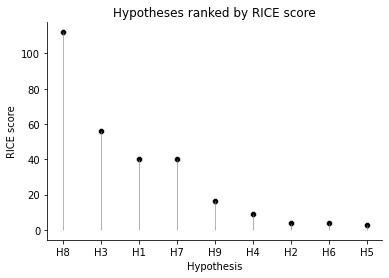

In [10]:
fig, ax = plt.subplots()

sns.scatterplot(x = 'H_n', y = 'RICE', data = h_by_RICE, color = 'black')
plt.rcParams["figure.figsize"] = (10,5)
ax.vlines(x = h_by_RICE['H_n'], ymin = 0, ymax = h_by_RICE['RICE'], color = 'grey', alpha = 0.6, linewidth = 1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlabel('Hypothesis')
ax.set_ylabel('RICE score')
ax.set_title('Hypotheses ranked by RICE score')
    
plt.show()

Using the RICE framework, we can account for the number of users that a proposed change is likely to affect, when prioritising our hypotheses. Indeed we can see how this shifts the order of priority quite significantly: even though the birthday discount will likely affect quite a few of our users – everyone has a birthday at some point during the year – it won't affect a lot of users AT ONCE, and, for example, if we have high churn rates and low retention, a lot of users might be gone before they're even enticed by the prospect of getting a discount on their birthday. 

On the other hand, adding a subscription form to all of our main pages will definitely reach a lot of users while also having a nice impact perhaps in the way of us being to reach these users again and again if we need to (while also being a low-effort feature to put up). And so is adding a product recommendation block: if it's high up there on the store page, which is the most popular destination on our website presumably, it will surely reach a lot of people – and so this too changes our priority order.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Everything is correct here. You correctly applied both `ICE` & `RICE` frameworks. And based on the results, it is clear now what is the impact of the reach factor on overall value.
    
Additionally, you can use an interactive scatter plot (using plotly for example) to map all numbers per hypothesis to compare them.

<div class="alert alert-info"> <b>Student comments:</b> Thank you, I didn't think of that! I've made a simple scatter-turn lollipop chart. But I was wondering, what do you mean by interactive scatter plot, like plotting all the values that make up each RICE score (impact, reach, etc..) and then 'hueing' it by hypothesis? Could you please share an example, if you have one in mind? Thanks again!</div> 

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>
    
I was referring to smth like this (this example unfortunately in Seaborn): 
    
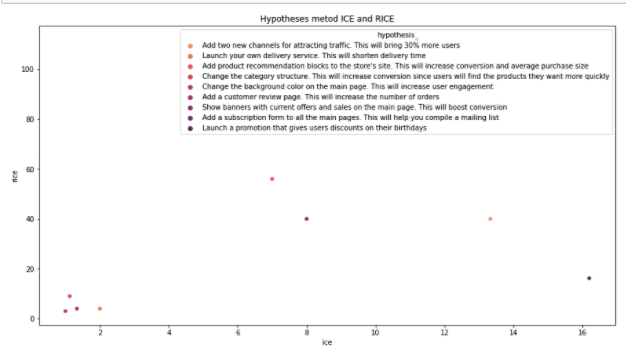 
    
But you can check examples with interactive scatter plots here:
https://towardsdatascience.com/using-plotly-express-to-create-interactive-scatter-plots-3699d8279b9e
https://plotly.com/python/line-and-scatter/
    
</div>

## A/B Test Analysis

Let us first clean the data and make sure it's properly preprocessed before we analyse it.

### Data Preprocessing

#### General prep

In [11]:
orders = pd.read_csv('/Users/rv/Desktop/practice_datasets/business_decisions_datasets/orders_us.csv')
visits = pd.read_csv('/Users/rv/Desktop/practice_datasets/business_decisions_datasets/visits_us.csv')

In [12]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [13]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Let's just check the timespan for our test:

In [14]:
orders['date'].min()

'2019-08-01'

In [15]:
orders['date'].max()

'2019-08-31'

Now we know our test was running for one month, so that's over how many days we'll be studying the changes in user behaviour and purchases. We can format our time values appropriately by changing them from object type to datetime (in both tables):

In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [17]:
orders['date'] = pd.to_datetime(orders['date'], format = '%Y-%m-%d')

In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [19]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [20]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visits['date'] = pd.to_datetime(visits['date'], format = '%Y-%m-%d')

In [22]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


All other values look good, the only other thing we can do is change the values under group columns to category since they can be either A or B. Memory isn't so much of a concern to us with tables as light as these, but we might as well follow good practice.

In [23]:
orders['group'] = orders['group'].astype('category')
visits['group'] = visits['group'].astype('category')

Let's check that we don't have any missing values in our dataset:

In [24]:
orders.isnull().sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [25]:
visits.isnull().sum()

date      0
group     0
visits    0
dtype: int64

Zero is my favourite number... of missing values 🥁

Checking that we don't have any duplicate rows:

In [26]:
orders.duplicated(subset = ['visitorId', 'transactionId']).sum()

0

In [27]:
visits.duplicated().sum()

0

Great! Now let's find out how big our overall sample is!

In [28]:
orders['visitorId'].nunique()

1031

We have just over a thousand of users recruited for the test. Let's see how many in each group:

In [29]:
orders.query('group == "A"')['visitorId'].nunique()

503

In [30]:
orders.query('group == "B"')['visitorId'].nunique()

586

OK so the samples are not equal in size, which isn't ideal but this is what we have. Given the opportunity, I would rather have taken this data to my colleagues and enquired as to why exactly this is the case.

However, here we might have a more serious issues that needs to be taken care of:

#### Resolving the mixed up A/B groups

In [31]:
orders.groupby('visitorId')['group'].nunique().reset_index().sort_values(by = 'group', ascending = False)

,visitorId,group
639,2654030115,2
932,3891541246,2
950,3941795274,2
340,1404934699,2
84,351125977,2
...,...,...
357,1476256851,1
358,1476741193,1
359,1484903144,1
360,1485964287,1


Namely, we have on our hands some users who appear to be in both groups which is weird (and might indeed be the source of the seeming size discrepancy between samples). We definitely don't want to mix up our test groups, so this needs to be dealth with. Let's double check our first user from the table above:

In [32]:
orders[orders['visitorId'] == 2654030115]

,transactionId,visitorId,date,revenue,group
1122,3620682463,2654030115,2019-08-13,35.5,B
1156,1254962016,2654030115,2019-08-14,35.5,A


So there we have the same user who has completed two purchases under different group aliases 🕵️. This must not play. This is likely due to a fault in the technical implementation of the recording system that probably hasn't checked whether the user had already been assigned to a group, so they were assigned a new group again, resulting in this. It's a problem, as it contaminates our data. We cannot rely on the data that we record on a user who'd seen both versions that we're testing because we have no way of isolating their behaviour now (we literally cannot isolate the users themselves since they are in both groups). So the best course of action is to lose these users completely. Let's see how many such cases we have:

Finding the number of rows (purchases) where users are in both A and B groups

In [33]:
len(orders[np.logical_and(orders['visitorId'].isin(orders[orders['group'] == "A"]['visitorId']), orders['visitorId'].isin(orders[orders['group'] == "B"]['visitorId']))])
           

181

Finding how many users are in both A and B groups

In [34]:
orders[np.logical_and(orders['visitorId'].isin(orders[orders['group'] == "A"]['visitorId']), orders['visitorId'].isin(orders[orders['group'] == "B"]['visitorId']))]['visitorId'].nunique()


58

That's 58 users, roughly 5% of users who made about 15% of all purchases (181 transactions). I want to say 'Not great, not terrible', in reverse order, because dropping 5% is not terrible when they're contaminated, but then losing 15% of all purchases made during the experiment is kind of a lot. 

Still, it seems to me that this is the best course of action because this sample is essentially contaminated, and analysing our data as it is will simply give unreliable results. One possible half-solution I can think of is to assign all these mixed up users the group to which they were first assigned to: based on our conjecture as to the reason behind this bug, the fault is likely with the reassignment, therefore the initial group separation must have been correct. However this is still a bad solution, as it doesn't address the more fundamental problem, namely that the users who've accidentally been exposed to more than their test version of the product contaminate the experiment. So I say, we drop them. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Well done! Great, that you identified these users. Indeed, having the same users in both groups contradicts the whole idea of A/B test.

In [35]:
contaminated = orders[np.logical_and(orders['visitorId'].isin(orders[orders['group'] == "A"]['visitorId']), orders['visitorId'].isin(orders[orders['group'] == "B"]['visitorId']))]['visitorId']

In [36]:
clean_orders = orders.query('visitorId not in(@contaminated)')

In [37]:
len(clean_orders[np.logical_and(clean_orders['visitorId'].isin(clean_orders[clean_orders['group'] == "A"]['visitorId']), clean_orders['visitorId'].isin(clean_orders[clean_orders['group'] == "B"]['visitorId']))])

0

In [38]:
clean_orders.query('group == "A"')['visitorId'].nunique()

445

In [39]:
clean_orders.query('group == "B"')['visitorId'].nunique()

528

In [40]:
clean_orders['visitorId'].nunique()

973

We've shed those 58 users who were mixed up, but we still have that unequal size, so we'll have to stick with that. 

By way of experiment, I've explored the option of reassigning the groups for my colleagues to see how it would look, and also to show that that doesn't mend the situation with different sizes of the test groups:

#### (Optional: reassigning users / purchases to their initial groups)

I'll create arbitrarily named tables in order to get a new column with the right groups for all the users, so that those who were assigned to different groups will have only one group – the one they were assigned to first. We can achieve that by grouping and doing some ✨ mergic ✨

In [41]:
n_orders = orders.groupby('visitorId').agg({'date': 'min', 'group': 'first'}).reset_index()

In [42]:
len(n_orders)

1031

In [43]:
n_orders.head()

,visitorId,date,group
0,5114589,2019-08-16,B
1,6958315,2019-08-04,B
2,8300375,2019-08-01,B
3,11685486,2019-08-23,A
4,39475350,2019-08-08,B


Now we'll add the group values for all the users from the original orders table, but we will only have those that happend on the users' first purchase date:

We can get rid of some columns in this table:

In [44]:
n_orders = n_orders.drop(columns = 'date')

And rename the new group column, to separate it from the column 'group' in the original table, as we'll be merging these two:

In [45]:
n_orders.columns = ['visitorId', 'n_group']

In [46]:
new_orders = orders.merge(n_orders, on = 'visitorId', how = 'left')

In [47]:
new_orders.head(40)

,transactionId,visitorId,date,revenue,group,n_group
0,3667963787,3312258926,2019-08-15,30.4,B,B
1,2804400009,3642806036,2019-08-15,15.2,B,B
2,2961555356,4069496402,2019-08-15,10.2,A,A
3,3797467345,1196621759,2019-08-15,155.1,B,B
4,2282983706,2322279887,2019-08-15,40.5,B,B
5,182168103,935554773,2019-08-15,35.0,B,B
6,398296753,2900797465,2019-08-15,30.6,B,B
7,2626614568,78758296,2019-08-15,20.1,A,A
8,1576988021,295230930,2019-08-15,215.9,A,A
9,1506739906,1882260405,2019-08-15,30.5,B,B


We can already see some changes if we scan the old and the new group columns together

Let's pick someone with a lot of orders to check:

In [48]:
new_orders[new_orders['visitorId'] == 2038680547]

,transactionId,visitorId,date,revenue,group,n_group
32,3666913472,2038680547,2019-08-15,30.8,B,B
117,722060263,2038680547,2019-08-22,15.7,A,B
227,4267573899,2038680547,2019-08-17,55.4,A,B
390,2415738512,2038680547,2019-08-25,5.2,A,B
577,3932236947,2038680547,2019-08-04,45.1,B,B
578,1570911533,2038680547,2019-08-04,25.5,A,B
605,1215730747,2038680547,2019-08-04,40.1,A,B
624,1666104258,2038680547,2019-08-29,40.2,B,B


Excellent!

However, we can see that this exercise in reassigning the correct groups doesn't solve the difference in sizes:

This is what we have after we got rid of the contaminated users altogether (and what we'll be working with):

In [49]:
clean_orders.query('group == "A"')['visitorId'].nunique()

445

In [50]:
clean_orders.query('group == "B"')['visitorId'].nunique()

528

And we still have difference more or less like that now:

In [51]:
new_orders.query('n_group == "A"')['visitorId'].nunique()

475

In [52]:
new_orders.query('n_group == "B"')['visitorId'].nunique()

556

But again, reassigning the correct groups retrospectively is wrong, because, given that we know – at least until it is proved otherwise – that these users, like that one with a lot of purchases throughout the month, have viewed different versions of the products, sometimes even multiple times, it simply defeats the purpose of the test. Reassigning them after the fact for the purpose of analysis definitely isn't the way to go, as it completely glosses over the fact thair behaviour could've been influenced in a way we can never know.

Therefore, let's proceed with the table clean_orders.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Outstanding data preprocessing section. You covered all possible data issues.

### Analysis

First let me just rename the clean_orders into orders so it's easier to work with...

In [53]:
orders = clean_orders

Another tiny change I wanted to make just to be more comfortable with the column names...

In [54]:
orders.columns = ['order_id', 'user_id', 'date', 'revenue', 'group']

Let me put a checklist here so it's easier to keep track of the steps needed to complete the analysis:

- [x]  Graph cumulative revenue by group. Make conclusions and conjectures.
- [x]  Graph cumulative average order size by group. Make conclusions and conjectures.
- [x]  Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
- [x]  Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
- [x]  Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
- [x]  Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
- [x]  Plot a scatter chart of order prices. Make conclusions and conjectures.
- [x]  Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
- [x]  Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
- [x]  Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
- [x]  Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
- [x]  Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
- [x]  Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

#### Cumulative Revenue

In order to calculate cumulative revenue per group / date that we can plot, let's aggregate the data by date and group first:

In [55]:
orders_agg_1 = orders.groupby(['date', 'group'], as_index = False).agg({'order_id': 'nunique', 'user_id': 'nunique', 'revenue': 'sum'})


And no we can split this data by groups:

In [56]:
c_A = orders_agg_1.query('group == "A"')[['date', 'revenue']]
c_B = orders_agg_1.query('group == "B"')[['date', 'revenue']]

And finally, add a column that will track accumulated revenue by adding on top of the revenue from the previous cells in 'revenue':

In [57]:
c_A['cum_rev'] = c_A['revenue'].cumsum()
c_B['cum_rev'] = c_B['revenue'].cumsum()

Let's check how it looks:

In [58]:
c_A.head()

,date,revenue,cum_rev
0,2019-08-01,2266.6,2266.6
2,2019-08-02,1468.3,3734.9
4,2019-08-03,1815.2,5550.1
6,2019-08-04,675.5,6225.6
8,2019-08-05,1398.0,7623.6


The values in the cumulative revenue column look right 👌 Now let's plot cumulative revenue for both groups:

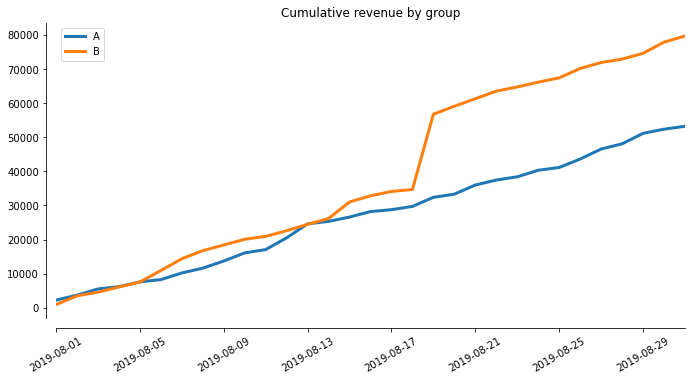

In [59]:
fig, ax = plt.subplots()

ax.plot(c_A['date'], c_A['cum_rev'], linewidth = 3, label = 'A')
ax.plot(c_B['date'], c_B['cum_rev'], linewidth = 3, label = 'B')
plt.legend()
plt.title('Cumulative revenue by group')
plt.rcParams["figure.figsize"] = (8,5)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(c_A['date'].min(), c_A['date'].max())
plt.show()

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Very nice data visualization.

It is a matter of taste, but you can also use `plt.grid()` to add grid to your graph and rotate x-axis ticks.

In [60]:
round(orders.query('group == "A"')['revenue'].sum())

53212

In [61]:
round(orders.query('group == "B"')['revenue'].sum())

79651

We can see that users from group B have definitely raked in more revenue, accounting for about 60% of total sales brought by both groups under the experiment. And while there was a point around the 13th of August when group A caught up for a moment, cumulative revenue brought by group B has grown again since then and had one power jump during the third week of August, when its cumulative revenue nearly doubled. This was likely because of a huge purchase made by some customer. We can see that this is irregular because it's a very abrupt hike with the growth continuing on a more normal trajectory before and after. So it would be wrong to consider this somehow related to the version of the product. To be more sure that one group consistently performs better, we must investigate average orders size as well as conversion from visitors to buyers.

🎃**SIDENOTE** 🎃

During the sprint, there was a different solution for aggregating data which seemed very clunky to me, it looked like this:



In [62]:
#datesGroups = orders[['date', 'group']].drop_duplicates()

# ordersAggregated = datesGroups.apply(
#     lambda x: orders[
#         np.logical_and(
#             orders['date'] <= x['date'], orders['group'] == x['group']
#         )
#     ].agg(
#         {
#             'date': 'max',
#             'group': 'max',
#             'orderId': pd.Series.nunique,
#             'userId': pd.Series.nunique,
#             'revenue': 'sum',
#         }
#     ),
#     axis=1,
# ).sort_values(by=['date', 'group'])

This is the aggregating solution for data on orders. I wanted to do it my own way from the start because, unlike this above, it allows me to just plot average and not cumulative data all the time, in case I need to. And it just makes more sense that we group data by date and group itself if we need to, instead of jumping all over the place with a lambda function applied to the skeleton of [['date', 'group']]. 

Anyway, the point is that I wanted to practice this solution from the exerciser too, just so I could wrap my head around it better and also double check my own solution. But it didn't work, and it took me 2 hours to find out that it was breaking down because I've previously turned values in the group columns to 'category' data type instead of the standard object that it was. So this is just a heads-up :) It was really tricky to pinpoint, because the error system told me there was some sort of a recursion problem or that it had trouble indexing the date column. So it turns out that some part of the lambda or the apply function doesn't work with category data type, but after changing the group values back to string object type it works perfectly. I was too tired to find out why, but in case you know – I'd appreciate if you share! ^^

🎃**END OF SIDENOTE** 🎃

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Working with categorical type is indeed quite tricky in pandas and I think some strange things have been fixed in latest releases but still it is quite fragile. 
    
Some examples and tips you can check here: https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a    

<div class="alert alert-info"> <b>Student comments:</b> Thanks, that's an excellent article!</div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
🙌 

#### Cumulative Average Order Size

In order to calculate this we just need an extra column of orders (order_id) in our data by group, which we can get from the aggregated orders table (the number of orders):

In [63]:
orders_agg_1.head()

,date,group,order_id,user_id,revenue
0,2019-08-01,A,23,19,2266.6
1,2019-08-01,B,17,17,967.2
2,2019-08-02,A,19,18,1468.3
3,2019-08-02,B,23,22,2568.1
4,2019-08-03,A,24,24,1815.2


We'll do similar separation into groups, but with the added column of orders. I'll call the variable os_A and os_B for order size:

In [64]:
os_A = orders_agg_1.query('group == "A"')[['date', 'order_id', 'revenue']]
os_B = orders_agg_1.query('group == "B"')[['date', 'order_id', 'revenue']]

And add the column with cumulative average order size, which we'll find by dividing the cumulative revenue by the cumulative number of orders (order_id). (First we'll add those columns):

In [65]:
os_A['cum_rev'] = os_A['revenue'].cumsum()
os_B['cum_rev'] = os_B['revenue'].cumsum()

os_A['cum_orders'] = os_A['order_id'].cumsum()
os_B['cum_orders'] = os_B['order_id'].cumsum()

os_A['cum_avg_os'] = os_A['cum_rev'] / os_A['cum_orders']
os_B['cum_avg_os'] = os_B['cum_rev'] / os_B['cum_orders']

Now let's see how the average order size changed for each group:

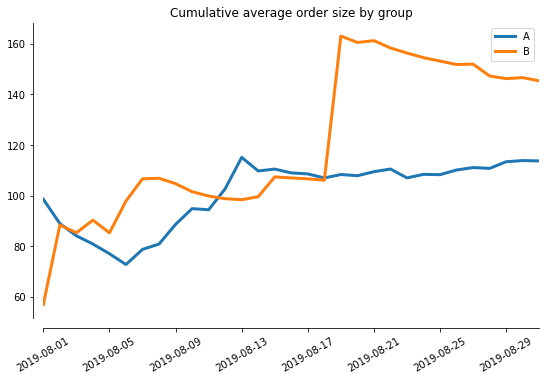

In [66]:
fig, ax = plt.subplots()

ax.plot(os_A['date'], os_A['cum_avg_os'], linewidth = 3, label = 'A')
ax.plot(os_B['date'], os_B['cum_avg_os'], linewidth = 3, label = 'B')
plt.legend()
plt.title('Cumulative average order size by group')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(os_A['date'].min(), os_A['date'].max())
plt.show()

Well here we can see that the cumulative average order size remains higher for group B, which is probably due – the value being cumulative – to the irregularly expensive orders made between the 2nd and 3rd week. We can also double check this against simply the average order sizes (not cumulative values):

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Once again everything is correct here.

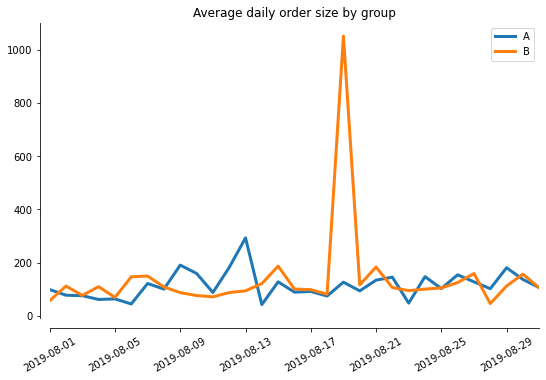

In [67]:
fig, ax = plt.subplots()

ax.plot(os_A['date'], (os_A['revenue'] / os_A['order_id']), linewidth = 3, label = 'A')
ax.plot(os_B['date'], (os_B['revenue'] / os_B['order_id']), linewidth = 3, label = 'B')
plt.legend()
plt.title('Average daily order size by group')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(os_A['date'].min(), os_A['date'].max())
plt.show()

We can see the spike on this graph being isolated from the rest of the days in terms of the average order size. It was clearly an anomalous order.

#### Relative Difference in Cumulative Average Order Size

We can also plot the relative difference between the two groups to try and gauge the dynamic between them. In order to do that, we'll need to merge the tables by date

In [68]:
merged_cum_data = os_A.merge(os_B, left_on = 'date', right_on = 'date', suffixes = ['A', 'B'])

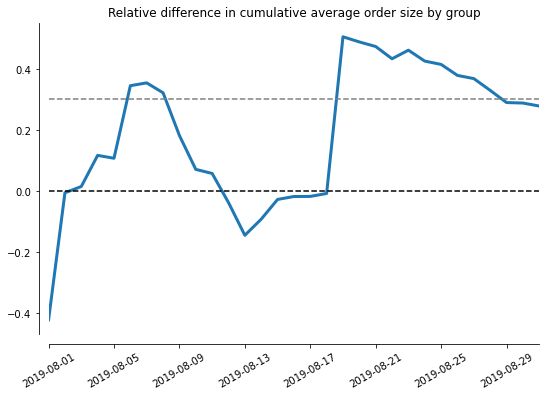

In [69]:
fig, ax = plt.subplots()

ax.plot(merged_cum_data['date'], (merged_cum_data['cum_avg_osB'] / merged_cum_data['cum_avg_osA'] - 1), linewidth = 3)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
plt.title('Relative difference in cumulative average order size by group')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(merged_cum_data['date'].min(), merged_cum_data['date'].max())
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.axhline(y = 0.3, color = 'grey', linestyle = '--')
plt.show()

Here we can see the difference by which the cumulative avg order size of group B exceeds group A. At the very start, during the launch of the experiment, the cumulative average order size was in fact 40% lower for group B, but as of the end of the month, it's 30% higher. 

We can see somewhat more clearly how for about a week this difference was not only not clear-cut, but wasn't even in group B's favour. And right after the large order was made some time after the 17th of August, we can see how the dynamic again began to shift slowly in group A's favour. This, again, suggests that the dynamic between them is still unclear and it doesn't look definitive that after some time, the cumulative average check won't be higher for group A.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Indeed, it could be helpful to study data without outliers. Also, interesting to note that difference has been stabilized in the last couple of days.

#### Conversion Rates

To calculate and study daily conversion rates, we'll merge our aggregated orders with visits tables:

In [70]:
table_for_cr = orders_agg_1.merge(visits, left_on = ['date', 'group'], right_on = ['date', 'group'])

In [71]:
table_for_cr.head()

,date,group,order_id,user_id,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,19,18,1468.3,619
3,2019-08-02,B,23,22,2568.1,581
4,2019-08-03,A,24,24,1815.2,507


Now we can add daily cr rate:

In [72]:
table_for_cr['cr'] = table_for_cr['order_id'] / table_for_cr['visits']

Finally, let's plot them:

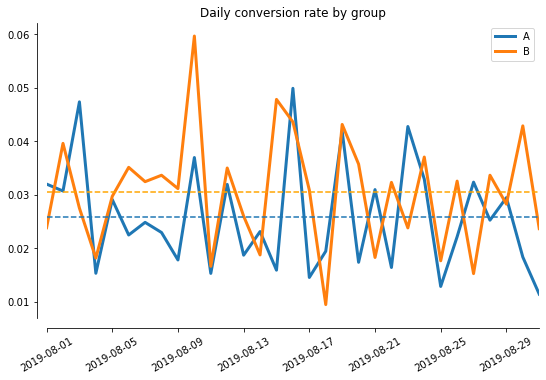

In [73]:
fig, ax = plt.subplots()

ax.plot(table_for_cr.query('group == "A"')['date'], table_for_cr.query('group == "A"')['cr'], linewidth = 3, label = 'A')
ax.plot(table_for_cr.query('group == "A"')['date'], table_for_cr.query('group == "B"')['cr'], linewidth = 3, label = 'B')
plt.legend()
plt.title('Daily conversion rate by group')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(table_for_cr['date'].min(), table_for_cr['date'].max())
plt.axhline(y = table_for_cr.query('group == "A"')['cr'].mean(), color = 'tab:blue', linestyle = '--')
plt.axhline(y = table_for_cr.query('group == "B"')['cr'].mean(), color = 'orange', linestyle = '--')
plt.show()

They are jumping all over the place from day to day, which makes it hard to say exactly what's going on. However we see that on average the conversion rate seems to be higher for group B. Let's plot the cumulative values to find out.

To do that, we'll need to disaggregate the table a little bit and count the cumulative values for each group.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Totally agree with your reasoning. Daily values are indeed quite messy. 

In [74]:
cr_A = table_for_cr.query('group == "A"')[['date', 'order_id', 'visits']]
cr_B = table_for_cr.query('group == "B"')[['date', 'order_id', 'visits']]

In [75]:
cr_A['cum_orders'] = cr_A['order_id'].cumsum()
cr_A['cum_vis'] = cr_A['visits'].cumsum()

cr_B['cum_orders'] = cr_B['order_id'].cumsum()
cr_B['cum_vis'] = cr_B['visits'].cumsum()

In [76]:
cr_A['cum_cr'] = cr_A['cum_orders'] / cr_A['cum_vis']
cr_B['cum_cr'] = cr_B['cum_orders'] / cr_B['cum_vis']

Now we see the difference in conversion rates based on accrued values over the month:

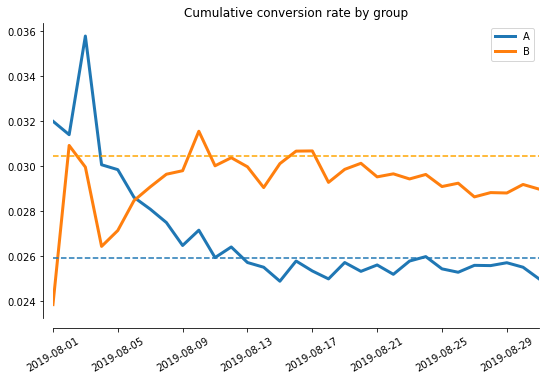

In [77]:
fig, ax = plt.subplots()

ax.plot(cr_A['date'], cr_A['cum_cr'], linewidth = 3, label = 'A')
ax.plot(cr_B['date'], cr_B['cum_cr'], linewidth = 3, label = 'B')
plt.legend()
plt.title('Cumulative conversion rate by group')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(cr_A['date'].min(), cr_A['date'].max())
plt.axhline(y = table_for_cr.query('group == "A"')['cr'].mean(), color = 'tab:blue', linestyle = '--')
plt.axhline(y = table_for_cr.query('group == "B"')['cr'].mean(), color = 'orange', linestyle = '--')
plt.show()

We can see how the values appear to have stabilised after about a week when the cumulative cr rates diverged in opposite directions for the two groups. However, we should be mindful of the previous graph. We saw that there was a low period for group A during the first two weeks which was visible even on that chainsaw of a plot, and we see that it's the same period over which the cumulative rate has diverged. 

We can observe peak distance between them right about the middle of the month on this graph here, but then the distance appears to be shrinking somewhat with the rate for group B trailing downward, while group A's rate appears to be holding ground and even starting to gain a little bit (even though on the very last days of observation both groups' rates start to go down). 

We can see this trend more clearly if we plot the relative difference between the CR rates:

In [78]:
merged_cr = cr_A.merge(cr_B, left_on = 'date', right_on = 'date', suffixes = ['A', 'B'])

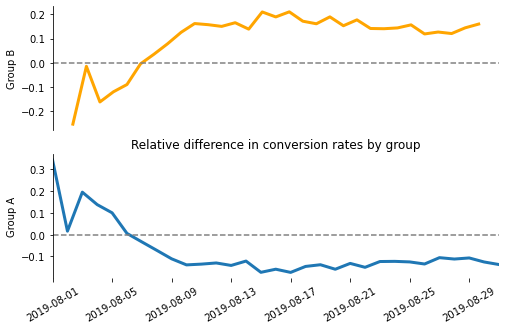

In [79]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

sns.lineplot(data = merged_cr, x=merged_cr['date'], y=(merged_cr['cum_crB'] / merged_cr['cum_crA'] - 1), color="orange", linewidth = 3, ax=ax1)
ax1.axhline(0, color="grey", linestyle = '--', clip_on=False)
ax1.set_ylabel("Group B")
ax1.set(xticklabels=[])
ax1.set(xlabel=None)
ax1.tick_params(bottom=False)
plt.title('Relative difference in conversion rates by group')

sns.lineplot(data = merged_cr, x=merged_cr['date'], y=(merged_cr['cum_crA'] / merged_cr['cum_crB'] - 1), color="tab:blue", linewidth = 3, ax=ax2)
ax2.axhline(0, color="grey", linestyle = '--', clip_on=False)
ax2.set_ylabel("Group A")
ax2.set(xlabel=None)

sns.despine(bottom=True)
plt.xticks(rotation=30)
plt.xlim(merged_cr['date'].min(), merged_cr['date'].max())
#plt.tight_layout()
plt.show()

At a second glance though, I'd rather say that the rate is still somewhat fluctuating for both groups. But for B perhaps it's early to speak of a downward trend.

<div class="alert alert-success">
<b>Reviewer's comment v1:</b>
    
Thanks for adding also difference graph for the cumulative conversion rates. I think with this it is more easier to say that Group B is indeed doing better.

#### Orders per User

Next we need to check the number of orders per user to see if we can spot outliers that can influence our analysis. For this, it's best to build a scatterplot of nunique orders per user, using the number of unique users for the x axis.

First, let's group our orders data by users:

In [80]:
orders.head()

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [81]:
o_by_u = orders.drop(['date', 'revenue'], axis = 1).groupby(['user_id', 'group'], as_index = False, observed = True).agg({'order_id': 'nunique'})
o_by_u.columns = ['user_id', 'group', 'orders']

In [82]:
x_values = pd.Series(range(0, len(o_by_u)))

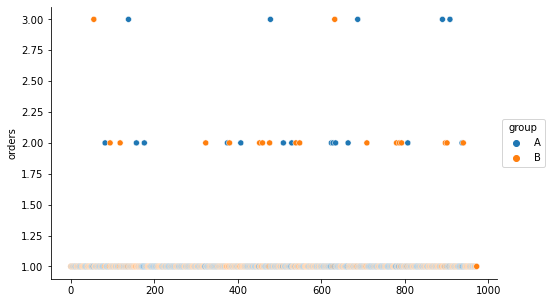

In [83]:
fig, ax = plt.subplots()

sns.scatterplot(x = x_values, y = 'orders', data = o_by_u, hue = 'group')
ax.legend(title = 'group', loc = 'center left', bbox_to_anchor = (1, 0.5))

#ax.scatterplot(x_values, o_by_u['orders'], alpha = 0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

We can see that the vast majority of users made one order: something like 20 users out of one thousand made more than one purchase, and about 7 users made 3. So it would make sense for us to try to filter our data to see what will change if we remove outliers. But first, let's check the percentile just to be sure.

#### Orders per User: Percentiles

In [84]:
print(np.percentile(o_by_u['orders'], [95, 99]))

[1. 2.]


It looks like between 5% and 1% of users, but more likely 2% to 3% (roughly 20+/1000) purchased more than once. With distribution like this, we can safely set 1 as the limit and filter anomalies on that basis. Ordering more than once appears to be extremely rare for our users.

#### Order Prices

We've seen that we have some users whose number of purchases might be considered anomalous in the context of our test groups. Now let's perform a similar check for the order sizes – or prices of orders. For this we don't need to group our data by users since it initially comes grouped by transactions:

In [85]:
x_values = pd.Series(range(0, len(orders)))

In [86]:
# fig, ax = plt.subplots()

# ax.scatter(x_values, orders['revenue'], alpha = 0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)

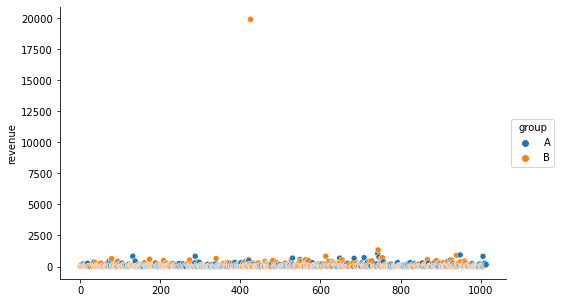

In [87]:
fig, ax = plt.subplots()

sns.scatterplot(x = x_values, y = 'revenue', data = orders, hue = 'group')
ax.legend(title = 'group', loc = 'center left', bbox_to_anchor = (1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

🧐I think we may have just found the one purchase responsible for group B's flying success. This is clearly a stray bullet in terms of how much we should take it into account for the results. We shouldn't. Let's zoom in before we check the percentiles:

In [88]:
# fig, ax = plt.subplots()

# ax.scatter(x_values, orders['revenue'], alpha = 0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.ylim(0, 3500)
# plt.show()

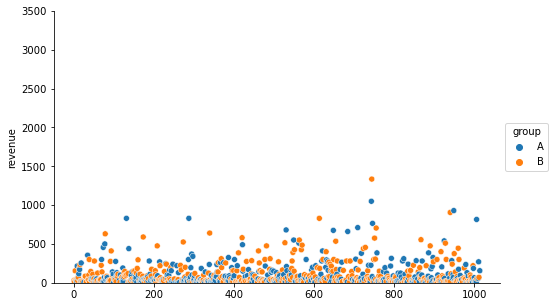

In [89]:
fig, ax = plt.subplots()

sns.scatterplot(x = x_values, y = 'revenue', data = orders, hue = 'group')
ax.legend(title = 'group', loc = 'center left', bbox_to_anchor = (1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0, 3500)
plt.show()

It's likely even that anything above 500 may be considered quite outlying in relation to most of the values.

In [90]:
# fig, ax = plt.subplots()

# ax.scatter(x_values, orders['revenue'], alpha = 0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.ylim(0, 1000)

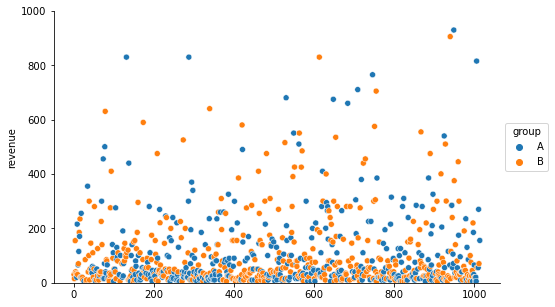

In [91]:
fig, ax = plt.subplots()

sns.scatterplot(x = x_values, y = 'revenue', data = orders, hue = 'group', alpha = 1)
ax.legend(title = 'group', loc = 'center left', bbox_to_anchor = (1, 0.5))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0, 1000)
plt.show()

Let's check the percentiles to be sure.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great scaterplots. Additionally you can color two groups on this graph using other 'hue' parameter (https://seaborn.pydata.org/generated/seaborn.scatterplot.html) or different data sources (https://moonbooks.org/Articles/How-to-create-a-scatter-plot-with-several-colors-in-matplotlib-/)

<div class="alert alert-info"> <b>Student comments:</b> Thanks Dmitrii, that's a great idea! </div>

#### Order Prices: Percentiles

In [92]:
print(np.percentile(orders['revenue'], [95, 99]))

[414.275 830.3  ]


Indeed we see that less than 5% go above 500 per order, so it will be reasonable to limit it at that. 

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
You correctly identified 95th and 99th percentiles of order prices. Now you have a threshold and data could be filtered.

#### Validating the Difference in Conversion Rates (Raw Data)

We've seen the perceived differences in conversion rate when we plotted the cumulative values for it. We used the table table_for_cr to calculate average daily conversion rates. To be more precise in our estimates, let's use these values and perform a Mann-Whitney statistical test, since we know already that their distribution is not normal.

In [93]:
A_cr = table_for_cr.query('group == "A"')['cr']
B_cr = table_for_cr.query('group == "B"')['cr']

We can use A_cr and B_cr as our two samples, respectively. Just to be sure, let's check for normality with a Shapiro test. The second value is the p_value. If it turns out greater than alpha of 0.05, then we need to consider the distribution normal and we're better off performing a t-test instead of Mann Whitney.

In [94]:
st.shapiro(A_cr)

ShapiroResult(statistic=0.9338854551315308, pvalue=0.05598486214876175)

In [95]:
st.shapiro(B_cr)

ShapiroResult(statistic=0.9762541055679321, pvalue=0.7027069926261902)

Well what do I know! Turns out the distribution of average daily conversion rates is indeed normal. This means we need to go for the t-test. But to perform that properly, we have to control for variance of our data, which we then specify inside the t-test. So let's perform a levene-test check first.

In [96]:
st.levene(A_cr, B_cr)

LeveneResult(statistic=0.0003349179434919493, pvalue=0.985459640402054)

Turns out the variances are equal. So before we perform the test, let's be clear about the hypothesis:

**Null hypothesis**:
The average daily conversion rate is equal for group A and group B: there is no statistically significant difference between them

**Alternative hypothesis**:
The difference in average daily conversion rate between group A and group B is statistically significant, so we must reject the Null Hypothesis

In [97]:
st.ttest_ind(A_cr, B_cr, equal_var=True)

Ttest_indResult(statistic=-1.6925038513866528, pvalue=0.09573715593918651)

The p value is greater than our level of statistical significance (alpha) of 0.05, there we CANNOT reject the Null Hypothesis: there is indeed no statistically significant difference between the two groups' average daily conversion rates. This confirms my initial scepticism about groub B's success. But personal vindication aside, this simply tells us not to jump to conclusions about which version of the product brings better conversion. At least not until we perform another statistical check with data filtered from outliers a bit later.

####  Validating the Difference in Average Order Size (Raw Data)

Let's see if there is a difference in average order size, or a price of purchase. We can about it the same way. But first, let us turn all those steps that we need to perform into a single function so we won't have to write everything out in the future:

In [98]:
def stat_test(sample1, sample2, alpha = 0.05):

    shapiro_stat1, shapiro_p1 = st.shapiro(sample1)
    shapiro_stat2, shapiro_p2 = st.shapiro(sample2)
    
    if shapiro_p1 > alpha and shapiro_p2 > alpha:
        levene_stat, levene_p = st.levene(sample1, sample2)
        
        if levene_p < alpha:
            stat, p_value = st.ttest_ind(sample1, sample2, equal_var = False)
        else:
            stat, p_value = st.ttest_ind(sample1, sample2, equal_var = True) 
            
    else:
        stat, p_value = st.mannwhitneyu(sample1, sample2)
        
    print('p_value: {:.3f}'.format(p_value))
    
    if p_value < alpha:
        print('Reject the Null Hypothesis')
    else:
        print('Fail to reject the Null Hypothesis')

With this we won't need to know which test is actually performed, but that shouldn't matter as long as the ones defined in our function's logic satisfy the necessary requirements. Let's test the difference in average order size now!

We already have os_A and os_B which are the group subsets of aggregated orders table. To create our samples with order sizes, we just need to add a column to each of them, and get rid of all the other columns:

In [99]:
avg_order_sizes_A = os_A['revenue'] / os_A['order_id']
avg_order_sizes_B = os_B['revenue'] / os_B['order_id']

Once again, the Null Hypothesis is that there is no difference between the groups' average order sizes.

In [100]:
stat_test(avg_order_sizes_A, avg_order_sizes_B)

p_value: 0.955
Fail to reject the Null Hypothesis


And again, we cannot reject the Null Hypothesis, since – as the test proves – there is no statistically significant difference between the groups' average order sizes. Based on this, there is no clear winner among the two version of the product so far. As we remember from the two graphs in section 2.2.2, the story is indeed not straightforward, and the cumulative graph was distorted by some high-flying outliers.

#### Validating the Difference in Conversion Rates (Filtered Data)

##### Filtering the Data

Earlier we found that any user who made more than one order, as well as any order more expensive than 500 should be considered an anomaly. We want to re-run our statistical tests to see if anything changes if we use filtered data. Let's start re-creating our main calculations by filtering the main orders table:

In [101]:
orders.head()

,order_id,user_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


Recall that it's the same one that's already been cleared of the compromised users who were present in both testing groups. We can filter our data using an 'external' slice of anomalous orders and users. 

In [102]:
a_orders = orders[orders['revenue'] > 500]['order_id']

In [103]:
len(a_orders)

37

So we'll have to get rid of 37 anomalous purchases (which includes a mammoth 20+ thousand one)

We already have a handy o_by_u (orders by users) table from previous calculations that we can use for finding anomalous users:

In [104]:
a_users = o_by_u[o_by_u['orders'] > 1]['user_id']

In [105]:
len(a_users)

36

And a total of 36 users who made more than 1 purchase. Let us keep in mind that this might mean trimming more rows than just 36+37, since the original orders table records purchases.

Now we can get the orders table without the anomalous users and purchases, and from there on we can recreate the calculations of conversion rates and average order sizes.

In [106]:
new_orders = orders[np.logical_and(~orders['user_id'].isin(a_users), ~orders['order_id'].isin(a_orders))]

In [107]:
len(new_orders)

901

##### Performing the Test

Let's first recreate the necessary calculations using filtered data:

In [108]:
new_orders_agg_1 = new_orders.groupby(['date', 'group'], as_index = False).agg({'order_id': 'nunique', 'user_id': 'nunique', 'revenue': 'sum'})
new_table_for_cr = new_orders_agg_1.merge(visits, left_on = ['date', 'group'], right_on = ['date', 'group'])
new_table_for_cr['cr'] = new_table_for_cr['order_id'] / new_table_for_cr['visits']
new_A_cr = new_table_for_cr.query('group == "A"')['cr']
new_B_cr = new_table_for_cr.query('group == "B"')['cr']

Alright! We can perform the test now:

In [109]:
stat_test(new_A_cr, new_B_cr)

p_value: 0.029
Reject the Null Hypothesis


Interesting! So the test using filtered data says that we must reject the Null Hypothesis which is that there is not statistically significant difference between the two groups' conversion rate.

In [110]:
print('{:.3}'.format(new_B_cr.mean()/new_A_cr.mean() - 1))

0.193


Looks like the relative gain in conversion rate for group B is indeed almost 20% compared to group A. This means that the graph that we saw for average cr as well as for the cumulative rates wouldn't change much if we plotted these values again using the filtered data. But something tells me that we can expect to see a change for the average order size as well as the cumulative revenue.

####  Validating the Difference in Average Order Size (Filtered Data)

Let's quickly recreate our calculations:

In [111]:
new_os_A = new_orders_agg_1.query('group == "A"')[['date', 'order_id', 'revenue']]
new_os_B = new_orders_agg_1.query('group == "B"')[['date', 'order_id', 'revenue']]

In [112]:
new_avg_order_sizes_A = new_os_A['revenue'] / os_A['order_id']
new_avg_order_sizes_B = new_os_B['revenue'] / os_B['order_id']

And run the test!

In [113]:
stat_test(new_avg_order_sizes_A, new_avg_order_sizes_B)

p_value: 0.823
Fail to reject the Null Hypothesis


Once again, as before, we cannot reject the Null Hypothesis: the test proves that there is no statistically significant difference between the groups' average order sizes, even when we discard the outliers.

Let's see what happens then if we plot the average order sizes and our cumulative revenue with filtered values:

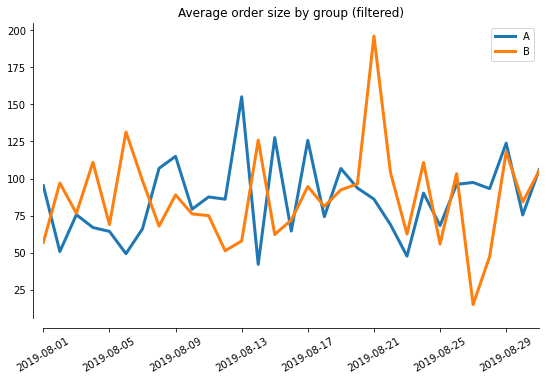

In [114]:
fig, ax = plt.subplots()

ax.plot(os_A['date'], (new_os_A['revenue'] / new_os_A['order_id']), linewidth = 3, label = 'A')
ax.plot(os_B['date'], (new_os_B['revenue'] / new_os_B['order_id']), linewidth = 3, label = 'B')
plt.legend()
ax.set_title('Average order size by group (filtered)')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(new_os_A['date'].min(), new_os_A['date'].max())
plt.show()

Well, there is a spike, but heed the scale of the Y axis compared to the same graph using raw data in section 2.2.2. Let's check the cumulative values:

In [115]:
new_os_A['cum_rev'] = new_os_A['revenue'].cumsum()
new_os_B['cum_rev'] = new_os_B['revenue'].cumsum()

new_os_A['cum_orders'] = new_os_A['order_id'].cumsum()
new_os_B['cum_orders'] = new_os_B['order_id'].cumsum()

new_os_A['cum_avg_os'] = new_os_A['cum_rev'] / os_A['cum_orders']
new_os_B['cum_avg_os'] = new_os_B['cum_rev'] / os_B['cum_orders']

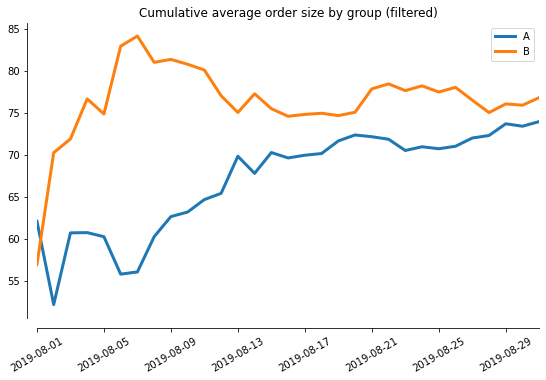

In [116]:
fig, ax = plt.subplots()

ax.plot(new_os_A['date'], new_os_A['cum_avg_os'], linewidth = 3, label = 'A')
ax.plot(new_os_B['date'], new_os_B['cum_avg_os'], linewidth = 3, label = 'B')
plt.legend()
ax.set_title('Cumulative average order size by group (filtered)')
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(new_os_A['date'].min(), new_os_A['date'].max())
plt.show()

Interesting: as the test goes on, we see how the values stabilise and group A is in fact catching up with B starting from about the half of the month. In fact, we can see that depsite B having a great start, its average cumulative order size is trending downwards starting after the first 7 or 10 days – although it too, is still not a clear trend, but somewhat fluctuating. For group A, however, the trajectory is that of continuous growth after the first week.

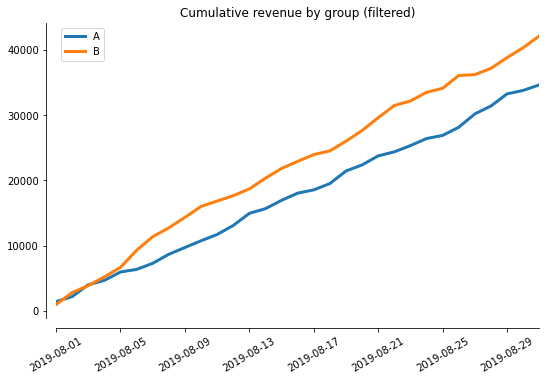

In [117]:
fig, ax = plt.subplots()

ax.plot(new_os_A['date'], new_os_A['cum_rev'], linewidth = 3, label = 'A')
ax.plot(new_os_B['date'], new_os_B['cum_rev'], linewidth = 3, label = 'B')
plt.legend()
ax.set_title('Cumulative revenue by group (filtered)')
plt.rcParams["figure.figsize"] = (8,5)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.tight_layout()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(rotation=30)
plt.xlim(new_os_A['date'].min(), new_os_A['date'].max())
plt.show()

We can see here how B wins on cumulative revenue, however this still looks like it's based on some early gains, as the gap doesn't grow by much as time goes on.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great job! Hypotheses have been formulated and tested correctly. Very good and detailed conclusions and data check before the test.

## Conclusion: should we stop the test and declare one of the groups a winner? Conclude there is no difference? Or continue running the test?

We've studied the data, filtering it for the faulty users who got into both groups, and then filtering it again from anomalies that we detected in order sizes with one particularly large purchase worth over 20000. We performed statistical tests to try and validate the perceived differences or indeed reject the differences in conversion rate and average order size between the groups. Now it's time to make some conclusions and recommendations.

First of all, it is necessary to point out a couple of problem with our data that we should keep in mind. The first problem is that the mixed up users who were in both groups at once contributed to a large part of the overall purchases. And this is a problem. If we had the resources, the ideal way would be to communicate this issue to our colleagues and relaunch the test by recruiting new users while, hopefully, not repeating the same mistake. The second issue is that our visits, unlike our orders data, were pre-aggregated, meaning that we as the analysts were unable to clean the data ***properly*** when we decided to filter according to order size or number of purchases. So when we performed the calculations of conversion rates again with the filtered data, the number of visits didn't account for this change. It would be ideal to be able to get the same users out of the visits table too.

Finally, let's consider the results that we got. We saw that there is indeed a statistically significant difference in conversion rates for the groups: users from group B converted more often than thouse from group A. However, it is not enough to make conclusions in favour of version B. Recall – and this is also the final caveat regarding our data, particularly against relying on cumulative revenue – that our samples were of unequal sizes, because more users from group B converted. So we cannot make judgements based on the cumulative revenue, because it could simply reflect the difference in the amount of buyers:

In [118]:
new_orders.query('group == "A"')['user_id'].nunique()

410

In [119]:
new_orders.query('group == "B"')['user_id'].nunique()

491

When we look at the average order sizes, however, this helps account for this difference, and it shows that indeed Group A is on an upward trend of increasing this value, while the same value stagnates or even declines for group B. If consult the graph for cumulative average order size by group, we can see that a bumpy and uneven start for both groups, but starting after first week group A has grown from roughly 55 to somewhere below 75, whereas group has decreased over the same period from 85 to just above 75:

In [120]:
new_os_B[['date','cum_avg_os']].tail()

,date,cum_avg_os
53,2019-08-27,76.493658
55,2019-08-28,75.013131
57,2019-08-29,76.044314
59,2019-08-30,75.891525
61,2019-08-31,76.799453


In [121]:
new_os_A[['date','cum_avg_os']].tail()

,date,cum_avg_os
52,2019-08-27,71.980907
54,2019-08-28,72.284332
56,2019-08-29,73.678271
58,2019-08-30,73.385000
60,2019-08-31,73.943162


Finally, the statistical check tells us there is likely no differnce in average order size between the two groups. Based on all this evidence, we can say that the results are inconclusive. And even though some show better results for group B, it could very well be the case after another couple of weeks that group A will start showing higher average order size. Based on this, the best course of action would be to let the test run for a couple more weeks or even a month. When we have more data, we will be able to tell with more certainty which group performs better.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> 

Great that you wrote about all important steps and findings in your project. 
 
And overall, you conducted great research with correct interim findings, clean code and nice visualization.
    
One comment about running the test is that we can mistakenly wait till the moment we get correct results (to face a peeking problem). 
    
You can check an article about it here: https://gopractice.io/blog/peeking-problem/#:~:text=by%20Oleg%20Yakubenkov-,Peeking%20problem%20%E2%80%93%20the%20fatal%20mistake%20in%20A%2FB%20testing%20and,A%2FB%20test%20is%20over
    
</div>

<div class="alert alert-info"> <b>Student comments:</b> Thanks again Dmitrii, I appreaciate your checking my project and leaving helpful tips. I'll make sure to check out all the articles!</div>  

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>
    
Very glad that smth was helpful! 